<a href="https://colab.research.google.com/github/Akash-mahandargi/R-programing/blob/main/EDA_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats


In [ ]:
data = pd.read_csv('/content/Cardiotocographic.csv')

In [ ]:
data = data.rename(columns={'data': 'df'})

In [ ]:
print("Initial Dataset Info:")
print("-" * 50)
print("\nShape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())


Initial Dataset Info:
--------------------------------------------------

Shape: (2126, 14)

Columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Handle missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns


In [ ]:
# For numeric columns, impute with median
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"\nImputed {data[col].isnull().sum()} missing values in {col} with median: {median_value}")



Imputed 0 missing values in LB with median: 133.0

Imputed 0 missing values in AC with median: 0.001633991

Imputed 0 missing values in DS with median: 0.0

Imputed 0 missing values in DP with median: 0.0

Imputed 0 missing values in MLTV with median: 7.4

Imputed 0 missing values in Width with median: 67.0

Imputed 0 missing values in Tendency with median: 0.0

Imputed 0 missing values in NSP with median: 1.0


<ipython-input-6-43d3e8b54568>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


In [ ]:
# For categorical columns, impute with mode
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
        print(f"\nImputed {data[col].isnull().sum()} missing values in {col} with mode: {mode_value}")


In [ ]:
# Convert data types where appropriate
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
            print(f"\nConverted {col} to numeric type")
        except:
            pass

In [ ]:
# Check for and remove duplicates
duplicate_count = data.duplicated().sum()
if duplicate_count > 0:
    data = data.drop_duplicates()
    print(f"\nRemoved {duplicate_count} duplicate rows")

print("\nFinal Dataset Shape:", data.shape)


Removed 2 duplicate rows

Final Dataset Shape: (2124, 14)


In [ ]:
# Basic statistical summary for numeric columns
print("Statistical Summary for Numerical Variables:")
print("-" * 50)
print(data.describe().round(2))

Statistical Summary for Numerical Variables:
--------------------------------------------------
            LB       AC       FM       UC       DL      DS       DP     ASTV  \
count  2124.00  2124.00  2124.00  2124.00  2124.00  2124.0  2124.00  2124.00   
mean    133.34     0.00     0.01     0.00     0.00     0.0     0.00    47.01   
std      11.21     0.00     0.07     0.00     0.00     0.0     0.00    18.81   
min      51.84    -0.02    -0.48    -0.01    -0.02    -0.0    -0.01   -63.00   
25%     126.00     0.00     0.00     0.00     0.00     0.0     0.00    32.00   
50%     133.00     0.00     0.00     0.00     0.00     0.0     0.00    49.00   
75%     140.00     0.01     0.00     0.01     0.00     0.0     0.00    61.00   
max     214.00     0.04     0.96     0.03     0.03     0.0     0.01   162.00   

          MSTV     ALTV     MLTV    Width  Tendency      NSP  
count  2124.00  2124.00  2124.00  2124.00   2124.00  2124.00  
mean      1.36    10.30     8.27    70.43      0.31     1

In [ ]:
# Additional statistics for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\nDetailed Statistics for {col}:")
    print("-" * 30)
    print(f"Skewness: {stats.skew(data[col].dropna()):.2f}")
    print(f"Kurtosis: {stats.kurtosis(data[col].dropna()):.2f}")
    print(f"IQR: {data[col].quantile(0.75) - data[col].quantile(0.25):.2f}")



Detailed Statistics for LB:
------------------------------
Skewness: 0.32
Kurtosis: 11.35
IQR: 14.00

Detailed Statistics for AC:
------------------------------
Skewness: 2.03
Kurtosis: 12.62
IQR: 0.01

Detailed Statistics for FM:
------------------------------
Skewness: 6.74
Kurtosis: 94.16
IQR: 0.00

Detailed Statistics for UC:
------------------------------
Skewness: 0.97
Kurtosis: 10.11
IQR: 0.00

Detailed Statistics for DL:
------------------------------
Skewness: 2.01
Kurtosis: 12.82
IQR: 0.00

Detailed Statistics for DS:
------------------------------
Skewness: 8.45
Kurtosis: 228.36
IQR: 0.00

Detailed Statistics for DP:
------------------------------
Skewness: 6.45
Kurtosis: 76.54
IQR: 0.00

Detailed Statistics for ASTV:
------------------------------
Skewness: 0.05
Kurtosis: 4.40
IQR: 29.00

Detailed Statistics for MSTV:
------------------------------
Skewness: 4.14
Kurtosis: 43.90
IQR: 1.00

Detailed Statistics for ALTV:
------------------------------
Skewness: 2.98
Kurtosis

In [ ]:
# Additional statistics for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\nDetailed Statistics for {col}:")
    print("-" * 30)
    print(f"Skewness: {stats.skew(data[col].dropna()):.2f}")
    print(f"Kurtosis: {stats.kurtosis(data[col].dropna()):.2f}")
    print(f"IQR: {data[col].quantile(0.75) - data[col].quantile(0.25):.2f}")



Detailed Statistics for LB:
------------------------------
Skewness: 0.32
Kurtosis: 11.35
IQR: 14.00

Detailed Statistics for AC:
------------------------------
Skewness: 2.03
Kurtosis: 12.62
IQR: 0.01

Detailed Statistics for FM:
------------------------------
Skewness: 6.74
Kurtosis: 94.16
IQR: 0.00

Detailed Statistics for UC:
------------------------------
Skewness: 0.97
Kurtosis: 10.11
IQR: 0.00

Detailed Statistics for DL:
------------------------------
Skewness: 2.01
Kurtosis: 12.82
IQR: 0.00

Detailed Statistics for DS:
------------------------------
Skewness: 8.45
Kurtosis: 228.36
IQR: 0.00

Detailed Statistics for DP:
------------------------------
Skewness: 6.45
Kurtosis: 76.54
IQR: 0.00

Detailed Statistics for ASTV:
------------------------------
Skewness: 0.05
Kurtosis: 4.40
IQR: 29.00

Detailed Statistics for MSTV:
------------------------------
Skewness: 4.14
Kurtosis: 43.90
IQR: 1.00

Detailed Statistics for ALTV:
------------------------------
Skewness: 2.98
Kurtosis

In [ ]:
# Summary for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nCategorical Variables Summary:")
    print("-" * 50)
    for col in categorical_cols:
        print(f"\n{col}:")
        value_counts = data[col].value_counts()
        proportions = data[col].value_counts(normalize=True)
        summary_data = pd.DataFrame({
            'Count': value_counts,
            'Percentage': proportions * 100
        })
        print(summary_data)
        print(f"Number of unique values: {data[col].nunique()}")

In [ ]:
# Set the style for all plots using Seaborn's set_theme
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")  # or any other Seaborn style like 'whitegrid', 'ticks' etc.
sns.set_palette("husl") # Set the color palette

In [ ]:
# Numeric Variables Distributions
numeric_cols = data.select_dtypes(include=[np.number]).columns
n_numeric = len(numeric_cols)


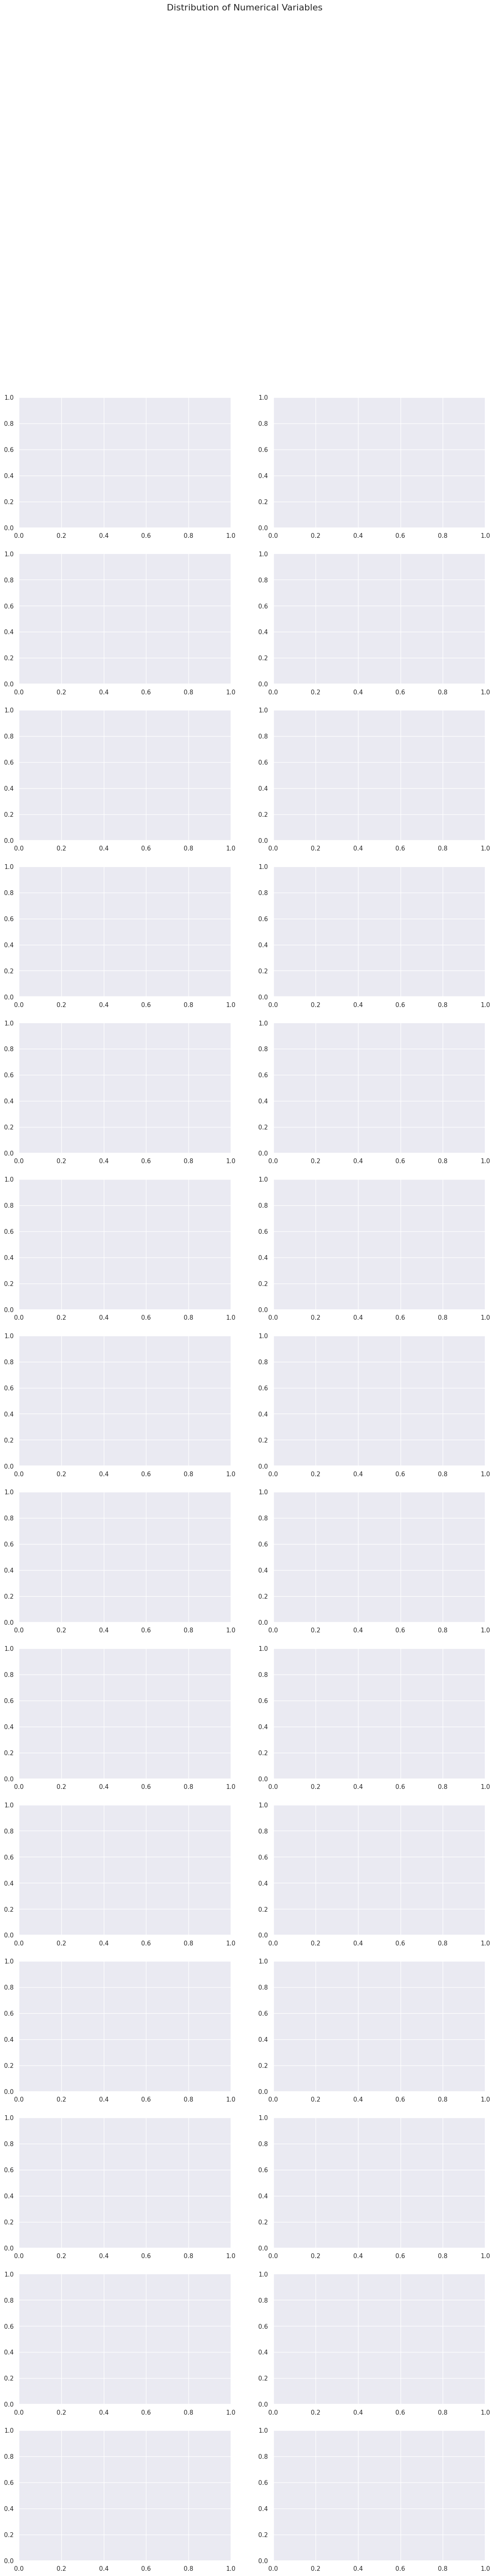

In [ ]:
if n_numeric > 0:
    # Create histograms and boxplots
    fig, axes = plt.subplots(n_numeric, 2, figsize=(15, 5*n_numeric))
    fig.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    for i, col in enumerate(numeric_cols):
        # Handle case where there's only one numeric column
        if n_numeric == 1:
            ax1, ax2 = axes
        else:
            ax1, ax2 = axes[i]


In [ ]:
        # Histogram
        sns.histplot(data=data, x=col, ax=ax1, kde=True)
        ax1.set_title(f'Histogram of {col}')

Text(0.5, 1.0, 'Histogram of NSP')

In [ ]:
    # Boxplot
        sns.boxplot(data=data, y=col, ax=ax2)
        ax2.set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


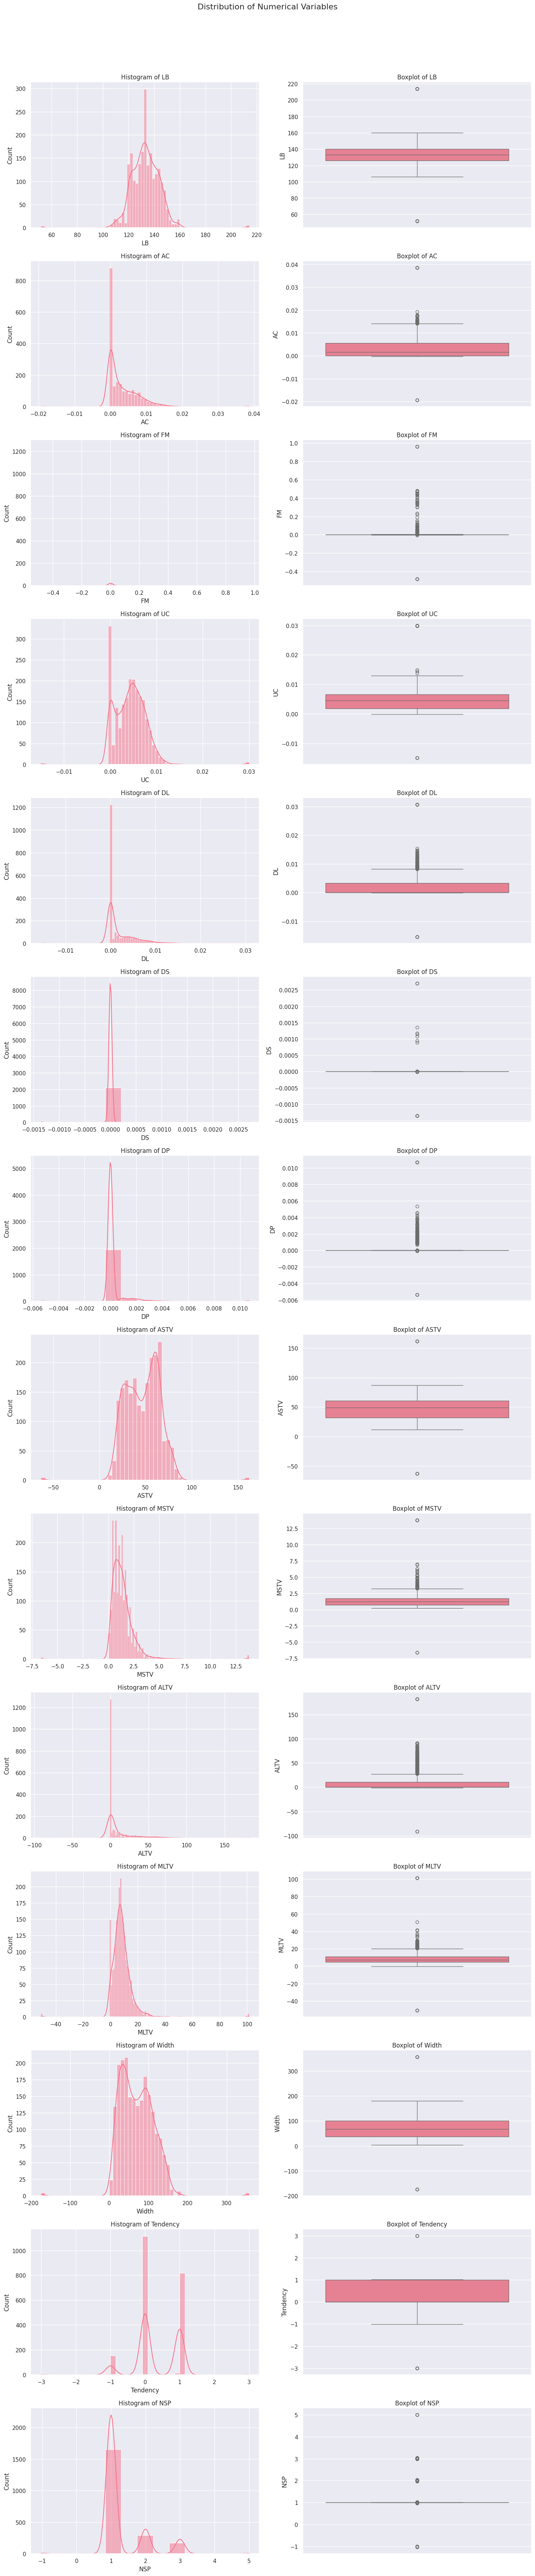

In [ ]:
if n_numeric > 0:
    # Create histograms and boxplots
    fig, axes = plt.subplots(n_numeric, 2, figsize=(15, 5*n_numeric))
    fig.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    for i, col in enumerate(numeric_cols):
        # Handle case where there's only one numeric column
        if n_numeric == 1:
            ax1, ax2 = axes
        else:
            ax1, ax2 = axes[i]

        # Histogram
        sns.histplot(data=data, x=col, ax=ax1, kde=True)
        ax1.set_title(f'Histogram of {col}')

        # Boxplot
        sns.boxplot(data=data, y=col, ax=ax2) # This line was incorrectly indented
        ax2.set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Categorical Variables Visualization
categorical_cols = data.select_dtypes(include=['object']).columns
n_categorical = len(categorical_cols)

if n_categorical > 0:
    plt.figure(figsize=(12, 5*n_categorical))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n_categorical, 1, i)
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

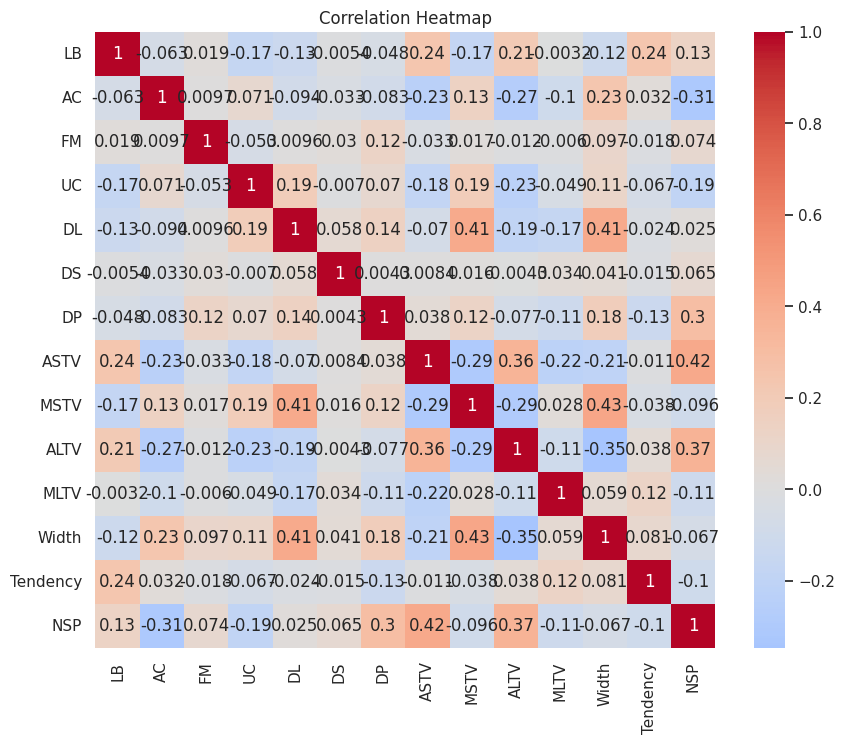

<ipython-input-30-09d07b43bc14>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


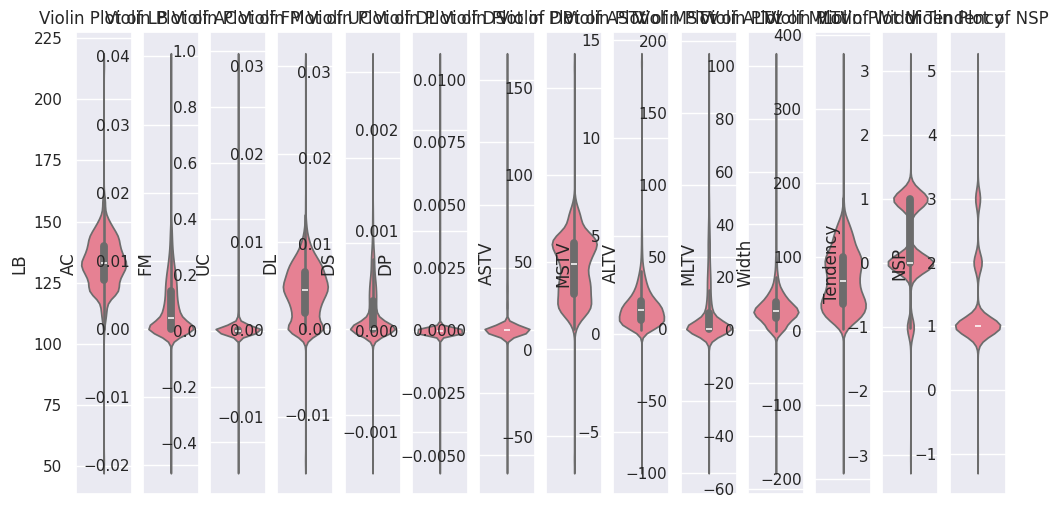

In [ ]:
# Correlation Heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

# Pairplot for numeric variables (if not too many)
if 2 <= len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.show()

# Violin plots for numeric variables
if n_numeric > 0:
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, n_numeric, i)
        sns.violinplot(y=data[col])
        plt.title(f'Violin Plot of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Pattern Analysis
print("Pattern Analysis and Insights")
print("-" * 50)

# Correlation Analysis
numeric_cols = data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation_matrix = data[numeric_cols].corr()

    # Find strong correlations (|r| > 0.5)
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_correlations.append({
                    'variables': (correlation_matrix.index[i], correlation_matrix.columns[j]),
                    'correlation': correlation_matrix.iloc[i, j]
                })

    if strong_correlations:
        print("\nStrong correlations found:")
        for corr in strong_correlations:
            print(f"{corr['variables'][0]} and {corr['variables'][1]}: {corr['correlation']:.3f}")

# Distribution Analysis
print("\nDistribution Analysis:")
for col in numeric_cols:
    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(data[col].dropna())
    print(f"\n{col}:")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Distribution appears non-normal")
    else:
        print("Distribution appears normal")

    # Check for skewness
    skewness = stats.skew(data[col].dropna())
    print(f"Skewness: {skewness:.2f}")
    if abs(skewness) > 1:
        print("Highly skewed distribution")
    elif abs(skewness) > 0.5:
        print("Moderately skewed distribution")
    else:
        print("Approximately symmetric distribution")

# Outlier Analysis
print("\nOutlier Analysis:")
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(data))*100:.2f}%")
        print(f"Outlier range: [{outliers.min():.2f}, {outliers.max():.2f}]")

Pattern Analysis and Insights
--------------------------------------------------

Distribution Analysis:

LB:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 0.32
Approximately symmetric distribution

AC:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 2.03
Highly skewed distribution

FM:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 6.74
Highly skewed distribution

UC:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 0.97
Moderately skewed distribution

DL:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 2.01
Highly skewed distribution

DS:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 8.45
Highly skewed distribution

DP:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 6.45
Highly skewed distribution

ASTV:
Shapiro-Wilk test p-value: 0.0000
Distribution appears non-normal
Skewness: 0.05
Ap

In [ ]:
import pandas as pd
import numpy as np

def generate_summary_report(data):
    """Generate a comprehensive summary report of the analysis"""
    print("EDA Summary Report")
    print("=" * 50)

    # Dataset Overview
    print("\n1. Dataset Overview")
    print("-" * 20)
    print(f"Total number of records: {len(data)}")
    print(f"Total number of features: {len(data.columns)}")
    print(f"Numeric features: {len(data.select_dtypes(include=[np.number]).columns)}")
    print(f"Categorical features: {len(data.select_dtypes(include=['object']).columns)}")

    # Data Quality
    print("\n2. Data Quality")
    print("-" * 20)
    missing_data = data.isnull().sum()
    if missing_data.sum() > 0:
        print("\nColumns with missing values:")
        print(missing_data[missing_data > 0])
    else:
        print("No missing values in the dataset")

    # Statistical Insights
    print("\n3. Key Statistical Insights")
    print("-" * 20)
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"Mean: {data[col].mean():.2f}")
        print(f"Median: {data[col].median():.2f}")
        print(f"Standard Deviation: {data[col].std():.2f}")

    # Correlation Summary
    if len(numeric_cols) > 1:
        correlations = data[numeric_cols].corr()
        high_correlations = []
        for i in range(len(correlations.columns)):
            for j in range(i):
                if abs(correlations.iloc[i, j]) > 0.5:
                    high_correlations.append({
                        'pair': (correlations.index[i], correlations.columns[j]),
                        'correlation': correlations.iloc[i, j]
                    })

        if high_correlations:
            print("\n4. Notable Correlations")
            print("-" * 20)
            for corr in high_correlations:
                print(f"{corr['pair'][0]} and {corr['pair'][1]}: {corr['correlation']:.3f}")

    # Recommendations
    print("\n5. Recommendations")
    print("-" * 20)

    # Based on missing values
    if missing_data.sum() > 0:
        print("- Consider additional data collection for columns with missing values")

    # Based on correlations
    if len(high_correlations) > 0:
        print("- Investigate highly correlated features for potential feature selection")

    # Based on outliers
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))][col]
        if len(outliers) > 0:
            print(f"- Investigate outliers in {col} (found {len(outliers)} outliers)")

# Generate the summary report
generate_summary_report(data)

EDA Summary Report

1. Dataset Overview
--------------------
Total number of records: 2124
Total number of features: 14
Numeric features: 14
Categorical features: 0

2. Data Quality
--------------------
No missing values in the dataset

3. Key Statistical Insights
--------------------

LB:
Mean: 133.34
Median: 133.00
Standard Deviation: 11.21

AC:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00

FM:
Mean: 0.01
Median: 0.00
Standard Deviation: 0.07

UC:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00

DL:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00

DS:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00

DP:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00

ASTV:
Mean: 47.01
Median: 49.00
Standard Deviation: 18.81

MSTV:
Mean: 1.36
Median: 1.20
Standard Deviation: 1.17

ALTV:
Mean: 10.30
Median: 0.00
Standard Deviation: 21.21

MLTV:
Mean: 8.27
Median: 7.40
Standard Deviation: 7.74

Width:
Mean: 70.43
Median: 67.00
Standard Deviation: 42.73

Tendency:
Mean: 0.31
Median: 0.00
Standar